<center> <h1>Numerical Methods  -- Assignment 5</h1> </center>

##  Problem1 -- Energy density

The matter and radiation density of the universe at redshift $z$ is
$$\Omega_m(z) = \Omega_{m,0}(1+z)^3$$
$$\Omega_r(z) = \Omega_{r,0}(1+z)^4$$
where $\Omega_{m,0}=0.315$ and $\Omega_r = 9.28656 \times 10^{-5}$

### (a) Plot

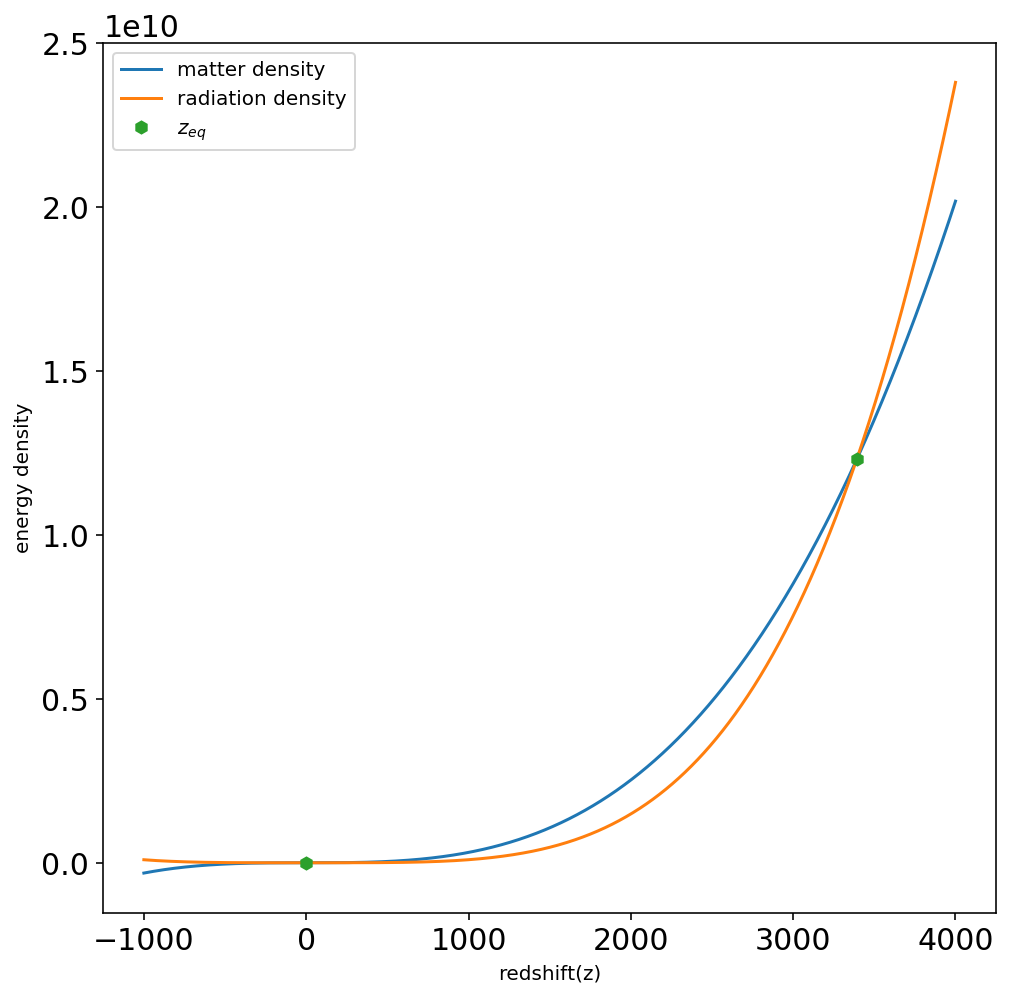

In [74]:
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import numpy as np

z = np.linspace(-1000,4000,10000)
O_m0 = 0.315
O_r0 = 9.28656e-5
O_m = O_m0*np.power(z+1,3)
O_r = O_r0*np.power(z+1,4)
#define where the roots are
x1 = -1; x2 = O_m0/O_r0
y1 = O_m0*np.power(x1+1,3)
y2 = O_m0*np.power(x2+1,3)
x = np.array([x1,x2])
y = np.array([y1,y2])
#plot the results
plt.figure(figsize=(8,8))
plt.plot(z,O_m,'-',label="matter density")
plt.plot(z,O_r,'-',label="radiation density")
plt.plot(x,y,'h',label=r"$z_{eq}$")
plt.xlabel("redshift(z)")
plt.ylabel("energy density")
plt.legend()
plt.show()

### (b) Analytical solution

An analytical solution can be found by equating the two equations. Since $z$ denotes for the redshift and it has a physical meaning, so it must take a real value for it to have a meaning. Thus
\begin{align*}
\Omega_m(z) &= \Omega_r(z)\\
\Omega_{m,0}(1+z)^3 &= \Omega_{r,0}(1+z)^4\\
(1+z)^3(0.315-9.28656 \times 10^{-5} z)&=0\\
(1+z)^3 &= 0\\
or \ (0.315-9.28656 \times 10^{-5} (z+1))&=0\\
\end{align*}
$z_1 = -1$ or $z_2 = 3391.0$

### (c) Bisection method

The bisection method in mathematics is a root-finding method that repeatedly bisects an interval and then selects a subinterval in which a root must lie for further processing. It is a very simple and robust method, but it is also relatively slow. scipy.optimize.bisect calculates the roots for a given function, but for it to work $f(a)$ and $f(b)$ must take different signs (so that there exists a root $\in [a,b]$).

In [2]:
from scipy.optimize import bisect

def f(z):
    O_m0 = 0.315
    O_r0 = 9.28656e-5
    O_m = O_m0*np.power(z+1,3)
    O_r = O_r0*np.power(z+1,4)
    return O_m -O_r
z1 = bisect(f,-1000,0,xtol=1e-10)
z2 = bisect(f,0,4000,xtol=1e-10)
print "The roots are found to be:",z1,z2

The roots are found to be: -1.00000000003 3390.9987595


### (d) Secant method

The $\textit{secant method}$ uses secant lines to find the root. A secant line is a straight line that intersects two points of a curve. In the secant method, a line is drawn between two points on the continuous function such that it extends and intersects the  $x$ axis. A secant line $y$ is drawn from $f(b)$ to $f(a)$ and intersects at point $c$ on the $x$ axis such that
$$y = \frac{f(b)-f(a)}{b-a}(c-b)+f(b)$$
The solution is therefore
$$c = b-f(b)\frac{b-a}{f(b)-f(a)}$$

In [3]:

def secant(f, x0, x1, eps):
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x1) > eps and iteration_counter < 100:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1)/denominator
        except ZeroDivisionError:
            print "Error! - denominator zero for x = ", x
            sys.exit(1)     # Abort with error
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter
#find the roots in the nearby region, with an accuracy of 1e-10
z1 = secant(f,-10,-0.5,1e-10)[0]
z2 = secant(f,3000,4000,1e-10)[0]

print "The roots are found to be:",z1,z2


The roots are found to be: -0.999466618551 3390.9987595


### (e) Newton-Raphson method

In numerical methods, $\textit{Newton-Raphson  method}$ is a method for finding successively better approximations to the roots of a real-valued function. The algorithm is as follows:
* Starting with a function $f$ defined over the real number $x$, the function's derivative $f'$, and an initial guess $x_0$ for a root of the fucntion $f$, then a better approximation $x_1$ is:
$$x_1 = x_0 -\frac{f(x_0)}{f'(x_0)}$$
* The process is then repeated as
$$x_{n+1} = x_n-\frac{f(x_n)}{f'(x_n)}$$
until a sufficiently satisfactory value is reached.

In [4]:
def fprime(z):
    O_m0 = 0.315
    O_r0 = 9.28656e-5
    O_m = O_m0*np.power(z+1,2)
    O_r = O_r0*np.power(z+1,3)
    return 3*O_m -4*O_r

def Newton(f, dfdx, x, eps):
    f_value = f(x)
    iteration_counter = 0
    while abs(f_value) > eps and iteration_counter < 100:
        try:
            x = x - float(f_value)/dfdx(x)
        except ZeroDivisionError:
            print "Error! - derivative zero for x = ", x
            sys.exit(1)     # Abort with error

        f_value = f(x)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    if abs(f_value) > eps:
        iteration_counter = -1
    return x, iteration_counter

z1 = Newton(f,fprime,0,1e-10)[0]
z2 = Newton(f,fprime,3000,1e-10)[0]
print "The roots are found to be:",z1,z2
    

The roots are found to be: -0.9993234602 3390.9987595


Now, change the initial guess far from the values obtained from (b). And test how the three algorithms perform respectively.

In [5]:
#test how the bisection method perform
import time
start1 = time.time()
z1 = bisect(f,-1000,1000,xtol=1e-10)
end1 = time.time()
start2 = time.time()
z2 = bisect(f,3000,10000,xtol=1e-10)
end2 = time.time()
err1 = abs((z1-(-1))/(-1))
err2 = abs((z2-(O_m0/O_r0-1))/(O_m0/O_r0-1))
print "The roots are found to be:",z1,z2
print "With a deviation of:",err1,err2
print "Time used are:",end1-start1,end2-start2

The roots are found to be: -1.00000000003 3390.9987595
With a deviation of: 3.31965566147e-11 1.11306528845e-14
Time used are: 0.00043797492981 0.000349998474121


In [6]:
#test how the secant method perform
start1 = time.time()
z1 = secant(f,-1000,1000,1e-10)[0]
end1 = time.time()
start2 = time.time()
z2 = secant(f,3000,10000,1e-10)[0]
end2 = time.time()
err1 = abs((z1-(-1))/(-1))
err2 = abs((z2-(O_m0/O_r0-1))/(O_m0/O_r0-1))
print "The roots are found to be:",z1,z2
print "With a deviation of:",err1,err2
print "Time used are:",end1-start1,end2-start2
print "Roots found after",secant(f,-10,-0.5,1e-10)[1],"and",secant(f,3000,4000,1e-10)[1],"loops"


The roots are found to be: -0.999414972528 3390.9987595
With a deviation of: 0.000585027471743 0.0
Time used are: 0.000823020935059 0.000194072723389
Roots found after 25 and 8 loops


In [7]:
#test how the newton-Raphson method perform
start1 = time.time()
z1 = Newton(f,fprime,-1000,1e-10)[0]
end1 = time.time()
start2 = time.time()
z2 = Newton(f,fprime,10000,1e-10)[0]
end2 = time.time()
err1 = abs((z1-(-1))/(-1))
err2 = abs((z2-(O_m0/O_r0-1))/(O_m0/O_r0-1))
print "The roots are found to be:",z1,z2
print "With a deviation of:",err1,err2
print "Time used are:",end1-start1,end2-start2
print "Roots found after",Newton(f,fprime,0,1e-10)[1],"and",Newton(f,fprime,3000,1e-10)[1],"loops"

The roots are found to be: -1.00051824126 3390.9987595
With a deviation of: 0.000518241260632 0.0
Time used are: 0.000991821289062 0.000278949737549
Roots found after 18 and 7 loops


It is not difficult to find out that tested with the function given, bisection method is the fastest and the most reliable method in finding the first root; however, in determining the second root, both the secant method and Newton's method showed better performance, with zero deviation from the actual value, and a much faster run time. But in general, when dealing with more complicated calculations, bisection method is relatively slow. But within a given tolerance Newton's method and secant method may probably show better performance.

## Problem 2 -- Potential

$\textit{Navarro-Frenk-White}$ and $\textit{Hernquist}$ potential can be expressed as the following equations:
$$\Phi_{NFW}(r) = \Phi_0\frac{r_s}{r}\,ln(1+r/r_s)$$
$$\Phi_{Hernquist}(r) = -\Phi_0\,\frac{1}{2(1+r/r_s)}$$
with $\Phi_0 = 1.659 \times 10^4 \ km^2/s^2$ and $r_s = 15.61 \ kpc$.
The apocentre and pericentre can be found by solving the following equation:
\begin{align*}
E_{tot} &= \frac{1}{2}\left(v_t^2+v_r^2\right)+\Phi\\
\end{align*}
where $L = J_r=rv_r$ is the angular momentum in the radial direction, and $E_{tot}$ is the total energy of the elliptical orbit and can be found by $(r,v_t,v_r)$ of a given star.
Define the residue function
$$R\equiv E_{tot} - \frac{1}{2}\left(\frac{L}{r}\right)^2-\Phi$$
so that the percenter and apocenter can be found when $R=0$.
Then, the radial action $J_r$ is defined as $\textit{(Jason L. Sanders,2015)}$
$$J_r = \frac{1}{\pi}\int_{r_p}^{r_a}dr\sqrt{2E-2\Phi-\frac{L^2}{r^2}}$$
where $r_p$ is the pericentric radius and $r_a$ is the apocentric radius.

The pericentre and apocentre are found to be: 7.75067639682 kpc and 178.316271432 kpc for the NFW profile
The pericentre is found to be: 7.75234061029 kpc for the Hernquist profile


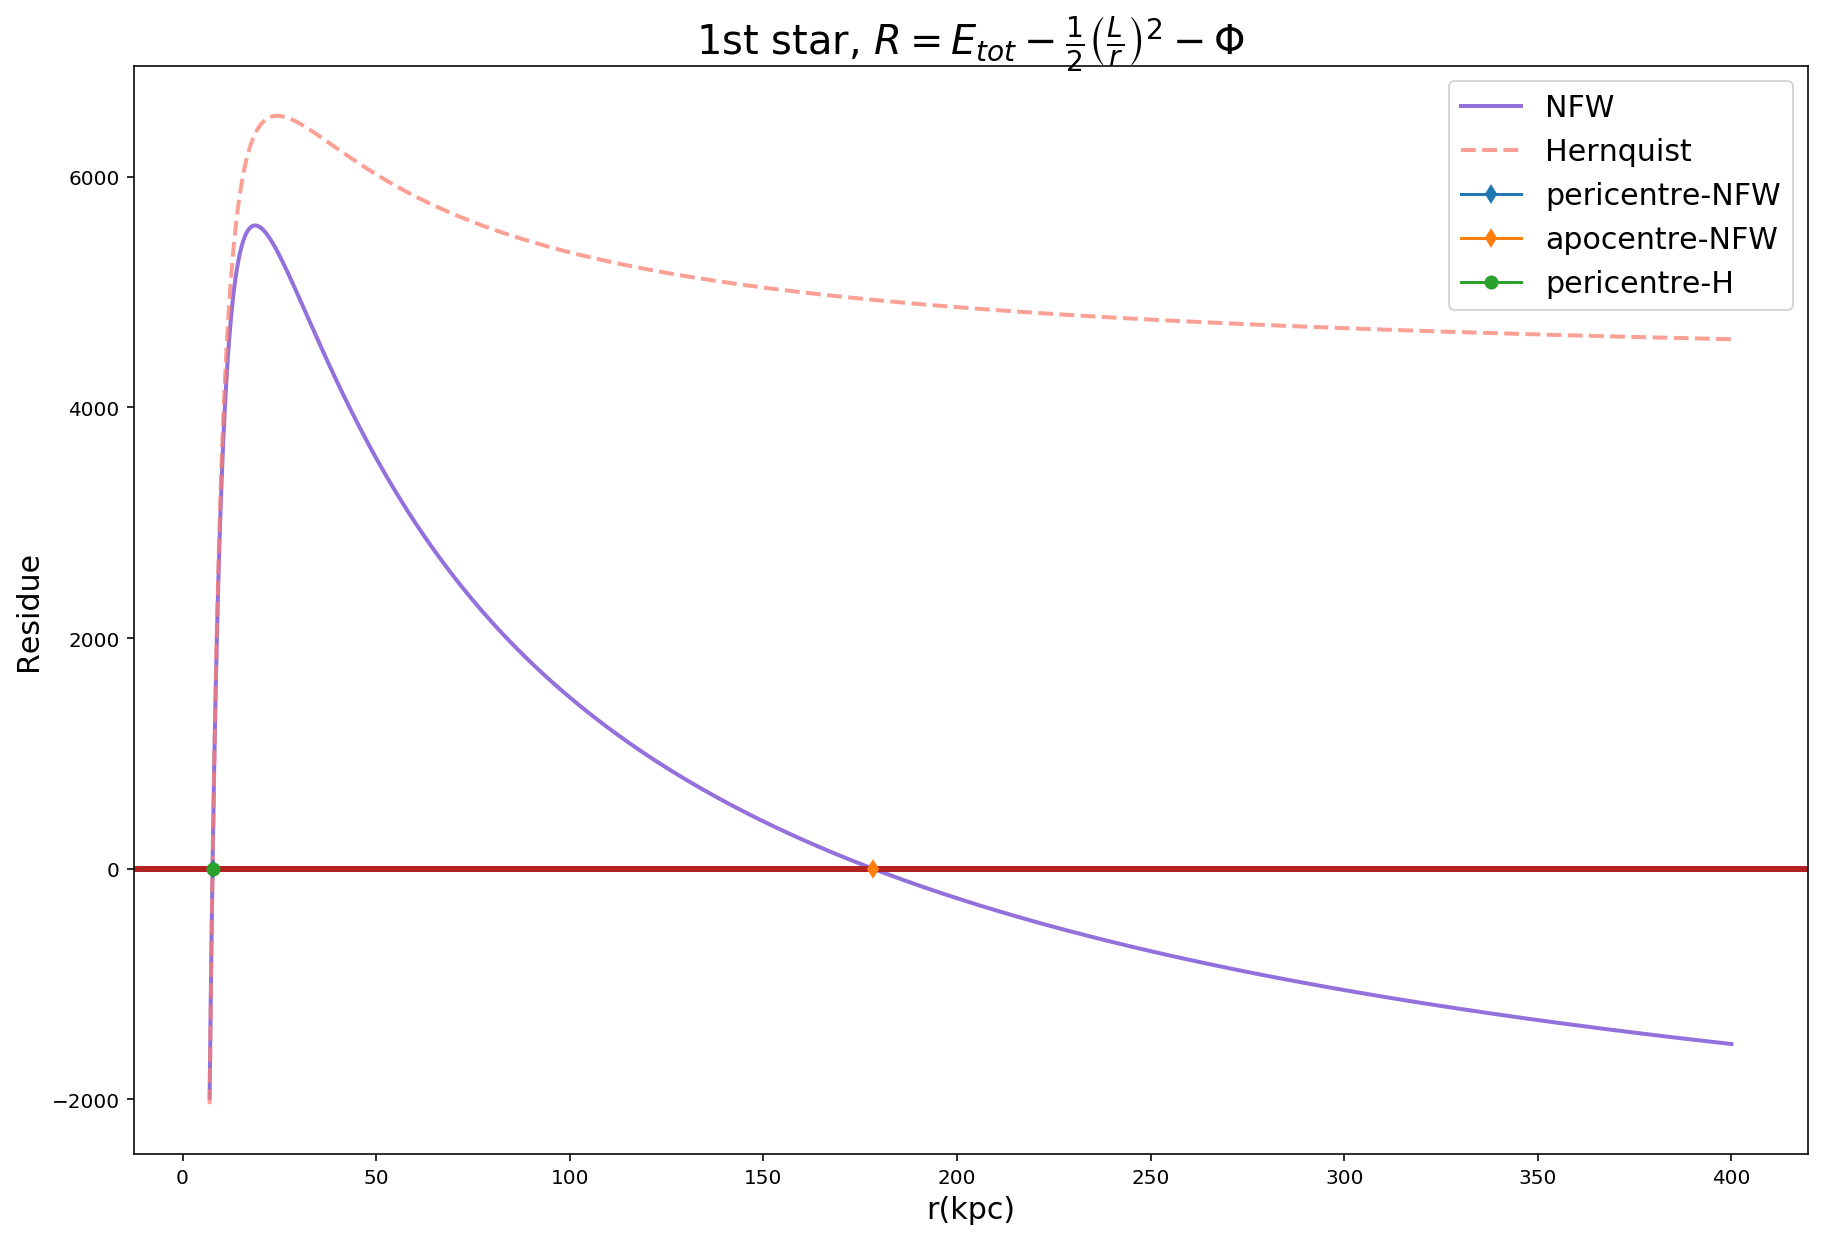

The radial action for NFW profile is: 3199.4488532 km/s kpc
The radial action for Hernquist profile is: 7538.14041138 km/s kpc


In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton
from scipy.integrate import quad
from math import * 

r = np.array([7.80500, 15.6100,31.2200,78.0500,156.100]) #r in kpc
vt = np.array([139.234,125.304,94.6439,84.5818,62.8640]) # vt in km/s
vr = np.array([-15.4704,53.7018,-283.932,-44.5818,157.160]) # vr in km/s
#NFW profile potential
def NFW(r):
    phi0 = 1.659e4
    rs = 15.61
    ratio = rs/r
    return -phi0*ratio*np.log(1+1/ratio)
#Hernquist profile potential
def H(r):
    phi0 = 1.659e4
    rs = 15.61
    ratio = r/rs
    return -phi0/(2*(1+ratio))
#1st derivative of Hernquist profile potential
def H_d(r):
    phi0 = 1.659e4
    rs = 15.61
    ratio = r/rs
    return phi0*0.5/rs*((1+ratio)**(-2))  
#1st derivative of NFW profile potential
def NFW_d(r):
    phi0 = 1.659e4
    rs = 15.61
    ratio = rs/r
    return -phi0*rs*((-1/r**2)*np.log(1+1/ratio)+1/(r*rs)*(1+1/ratio)**(-1))
#total energy, NFW profile
def E_NFW(r,vt,vr):
    E = 0.5*(vt**2+vr**2)+NFW(r)
    return E
#total energy, Hernquist profile
def E_H(r,vt,vr):
    E = 0.5*(vt**2+vr**2)+H(r)
    return E
#Residue function
def Re(r,Energy,momentum,p):
    return Energy - 0.5*(momentum/r)**2-p

#Residue function for NFW profile
def R_NFW(r,Energy,momentum):
    return Energy - 0.5*(momentum/r)**2-NFW(r)
#Residue function for Hernquist profile
def R_H(r,Energy,momentum):
    return Energy - 0.5*(momentum/r)**2-H(r)
#derivative of residue of NFW profile
def R_dNFW(r,Energy,momentum):
    return Energy*0+momentum**2*r**(-3)-NFW_d(r)
#derivative of residue of Hernquist profile
def R_dH(r,Energy,momentum):
    return Energy*0+momentum**2*r**(-3)-H_d(r)

#second derivative of residue of Hernquist profile, come handy if the 
#calculated value for pericentre for Hernquist profile is too far off
#from the value calculated for NFW profile
def R_ddH(r,Energy,momentum):
    phi0 = 1.659e4
    rs = 15.61
    ratio = r/rs
    return Energy*0-3*momentum**2*r**(-4)+phi0*0.5/rs**2*((1+ratio)**(-3)) 
#function that defines the radial action
def r_actionNFW(r,Energy,momentum):
    return np.sqrt(2*(Energy-NFW(r))-(momentum/r)**2)/pi
def r_actionH(r,Energy,momentum):
    return np.sqrt(2*(Energy-H(r))-(momentum/r)**2)/pi

R1 = np.linspace(7,400,1000)
R2 = np.linspace(10,500,1000)
R3 = np.linspace(7,600,1000)
R4 = np.linspace(50,800,1000)
R5 = np.linspace(50,1500,1000)
Momentum = r*vt
Energy_nfw = E_NFW(r,vt,vr)
Energy_h = E_H(r,vt,vr)
#plot results for 5 stars
#1st star
i = 0
R_nfw = Re(R1,Energy_nfw[i],Momentum[i],NFW(R1))
R_h = Re(R1,Energy_h[i],Momentum[i],H(R1))
plt.figure(figsize=(15,10))
plt.plot(R1,R_nfw,ls='-',label="NFW",color='#9370db',lw=2)
plt.plot(R1,R_h,ls='--',label="Hernquist",color='salmon',alpha=0.75,lw=2)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.axhline(y=0,color='#b22222',lw=3)
plt.title(r"1st star, $R= E_{tot} - \frac{1}{2}\left(\frac{L}{r}\right)^2-\Phi$",fontsize=20)
plt.xlabel("r(kpc)",fontsize=15)
plt.ylabel("Residue",fontsize=15)
z1 = newton(R_NFW,10,args=(Energy_nfw[i],Momentum[i]),fprime=R_dNFW)
z2 = newton(R_NFW,100,args=(Energy_nfw[i],Momentum[i]),fprime=R_dNFW)
e1 = R_NFW(z1,Energy_nfw[i],Momentum[i])
e2 = R_NFW(z2,Energy_nfw[i],Momentum[i])
print "The pericentre and apocentre are found to be:",z1,"kpc","and",z2,"kpc","for the NFW profile"
plt.plot(z1,e1,marker='d',label='pericentre-NFW')
plt.plot(z2,e2,marker='d',label='apocentre-NFW')
z3 = newton(R_H,10,args=(Energy_h[i],Momentum[i]),fprime=R_dH)
e3 = Re(z1,Energy_h[i],Momentum[i],H(z1))
print "The pericentre is found to be:",z3,"kpc","for the Hernquist profile"
plt.plot(z1,e1,marker='o',label='pericentre-H')
plt.legend(fontsize=15)
plt.show()

J_NFW = quad(r_actionNFW,z1,z2,args=(Energy_nfw[i],Momentum[i]))
print "The radial action for NFW profile is:",J_NFW[0],"km/s kpc"
J_H = quad(r_actionH,z3,np.inf,args=(Energy_h[i],Momentum[i]))
print "The radial action for Hernquist profile is:",J_H[0],"km/s kpc"

The pericentre and apocentre are found to be: 14.1075227275 kpc and 375.764622203 kpc for the NFW profile
The pericentre is found to be: 14.1986051415 kpc for the Hernquist profile


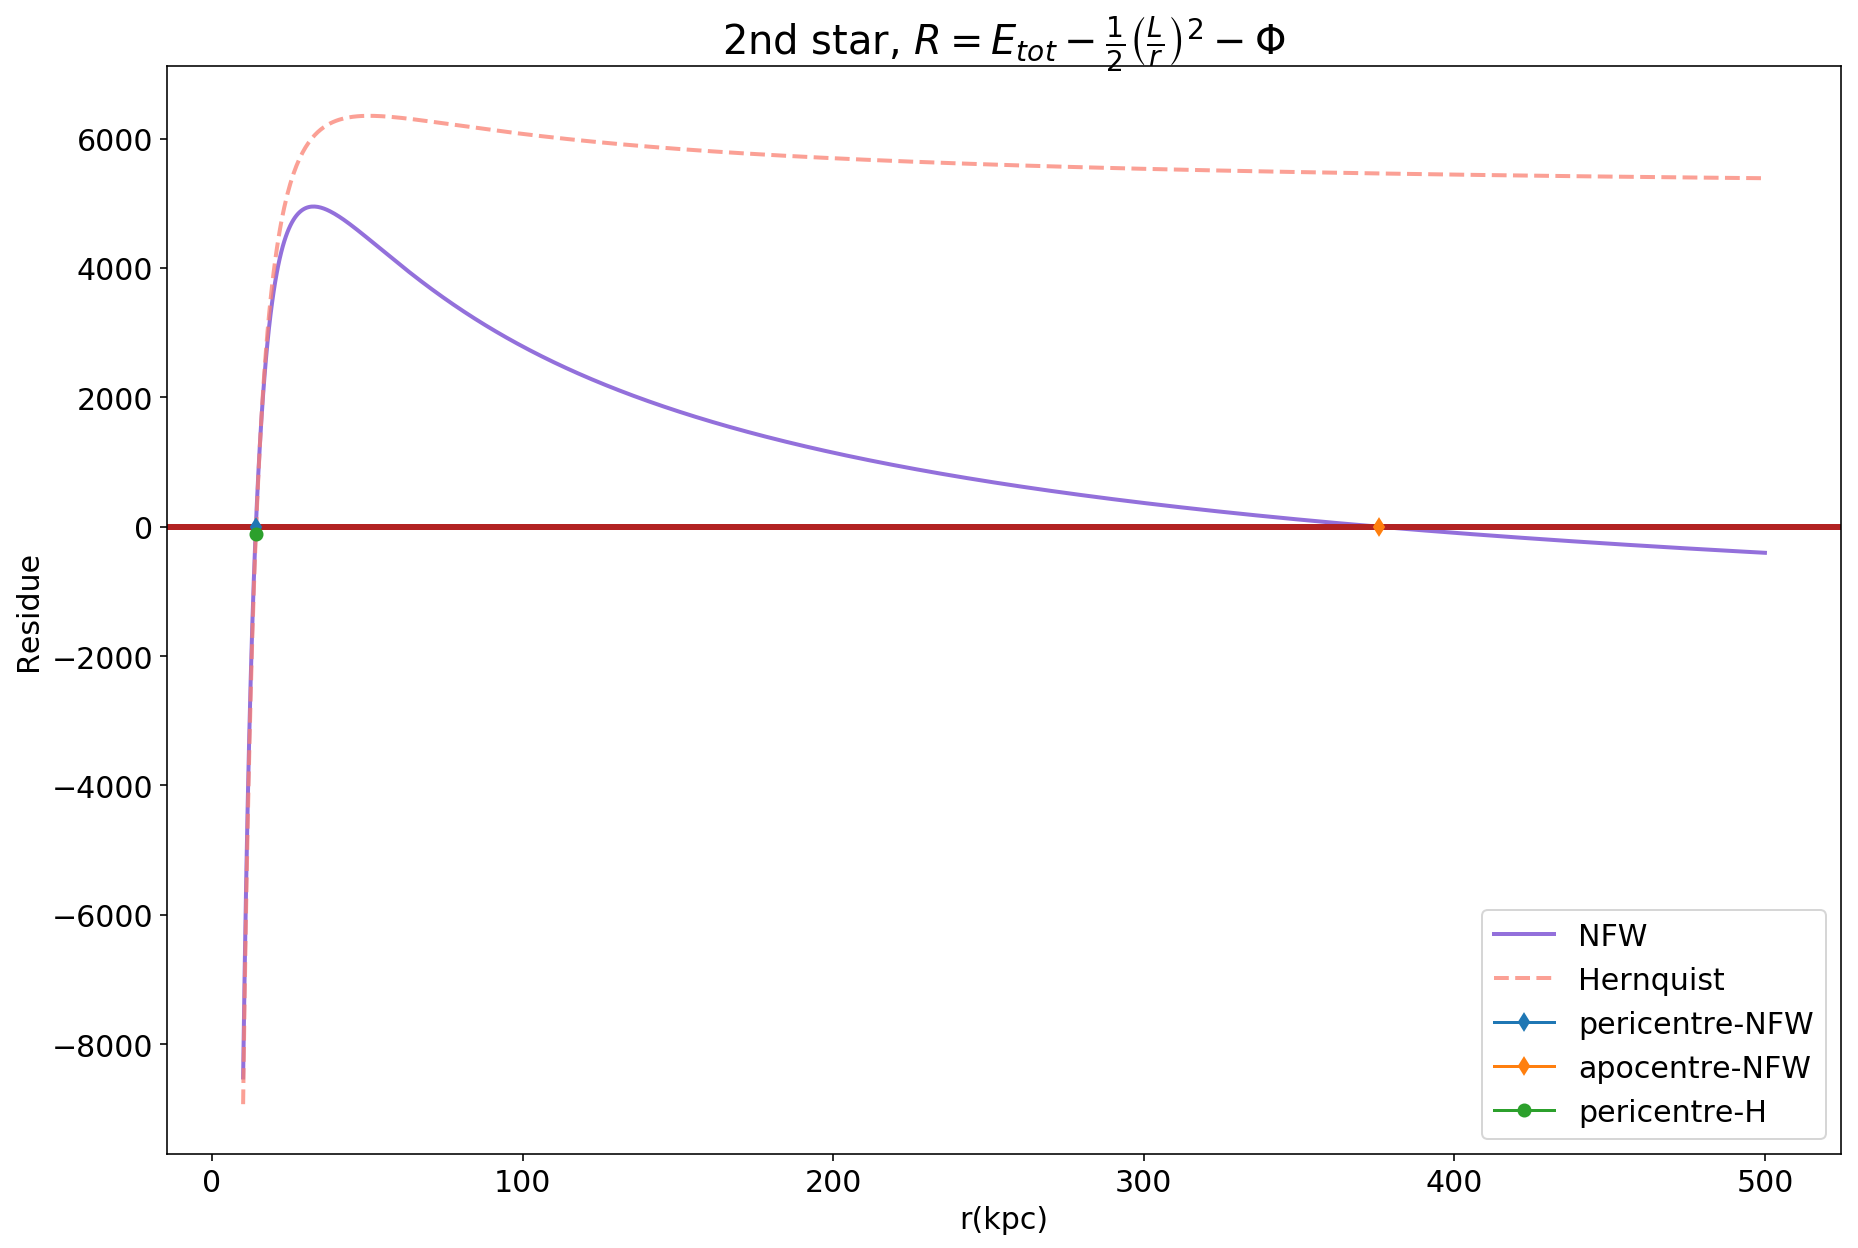

The radial action for NFW profile is: 5914.91240267 km/s kpc
The radial action for Hernquist profile is: 6892.22650146 km/s kpc


In [9]:
#2nd star
i = 1
R_nfw = Re(R2,Energy_nfw[i],Momentum[i],NFW(R2))
R_h = Re(R2,Energy_h[i],Momentum[i],H(R2))
plt.figure(figsize=(15,10))
plt.plot(R2,R_nfw,ls='-',label="NFW",color='#9370db',lw=2)
plt.plot(R2,R_h,ls='--',label="Hernquist",color='salmon',alpha=0.75,lw=2)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.axhline(y=0,color='#b22222',lw=3)
plt.title(r"2nd star, $R= E_{tot} - \frac{1}{2}\left(\frac{L}{r}\right)^2-\Phi$",fontsize=20)
plt.xlabel("r(kpc)",fontsize=15)
plt.ylabel("Residue",fontsize=15)
z1 = newton(R_NFW,10,args=(Energy_nfw[i],Momentum[i]),fprime=R_dNFW)
z2 = newton(R_NFW,400,args=(Energy_nfw[i],Momentum[i]),fprime=R_dNFW)
e1 = R_NFW(z1,Energy_nfw[i],Momentum[i])
e2 = R_NFW(z2,Energy_nfw[i],Momentum[i])
print "The pericentre and apocentre are found to be:",z1,"kpc","and",z2,"kpc","for the NFW profile"
plt.plot(z1,e1,marker='d',label='pericentre-NFW')
plt.plot(z2,e2,marker='d',label='apocentre-NFW')
z3 = newton(R_H,10,args=(Energy_h[i],Momentum[i]),fprime=R_dH)
e3 = Re(z1,Energy_h[i],Momentum[i],H(z1))
print "The pericentre is found to be:",z3,"kpc","for the Hernquist profile"
plt.plot(z3,e3,marker='o',label='pericentre-H')
plt.legend(fontsize=15)
plt.show()

J_NFW = quad(r_actionNFW,z1,z2,args=(Energy_nfw[i],Momentum[i]))
print "The radial action for NFW profile is:",J_NFW[0],"km/s kpc"
J_H = quad(r_actionH,z3,np.inf,args=(Energy_h[i],Momentum[i]))
print "The radial action for Hernquist profile is:",J_H[0],"km/s kpc"

The pericentre is found to be: 9.47357617853 kpc for the NFW profile
The pericentre is found to be: 9.62166037758 kpc for the Hernquist profile


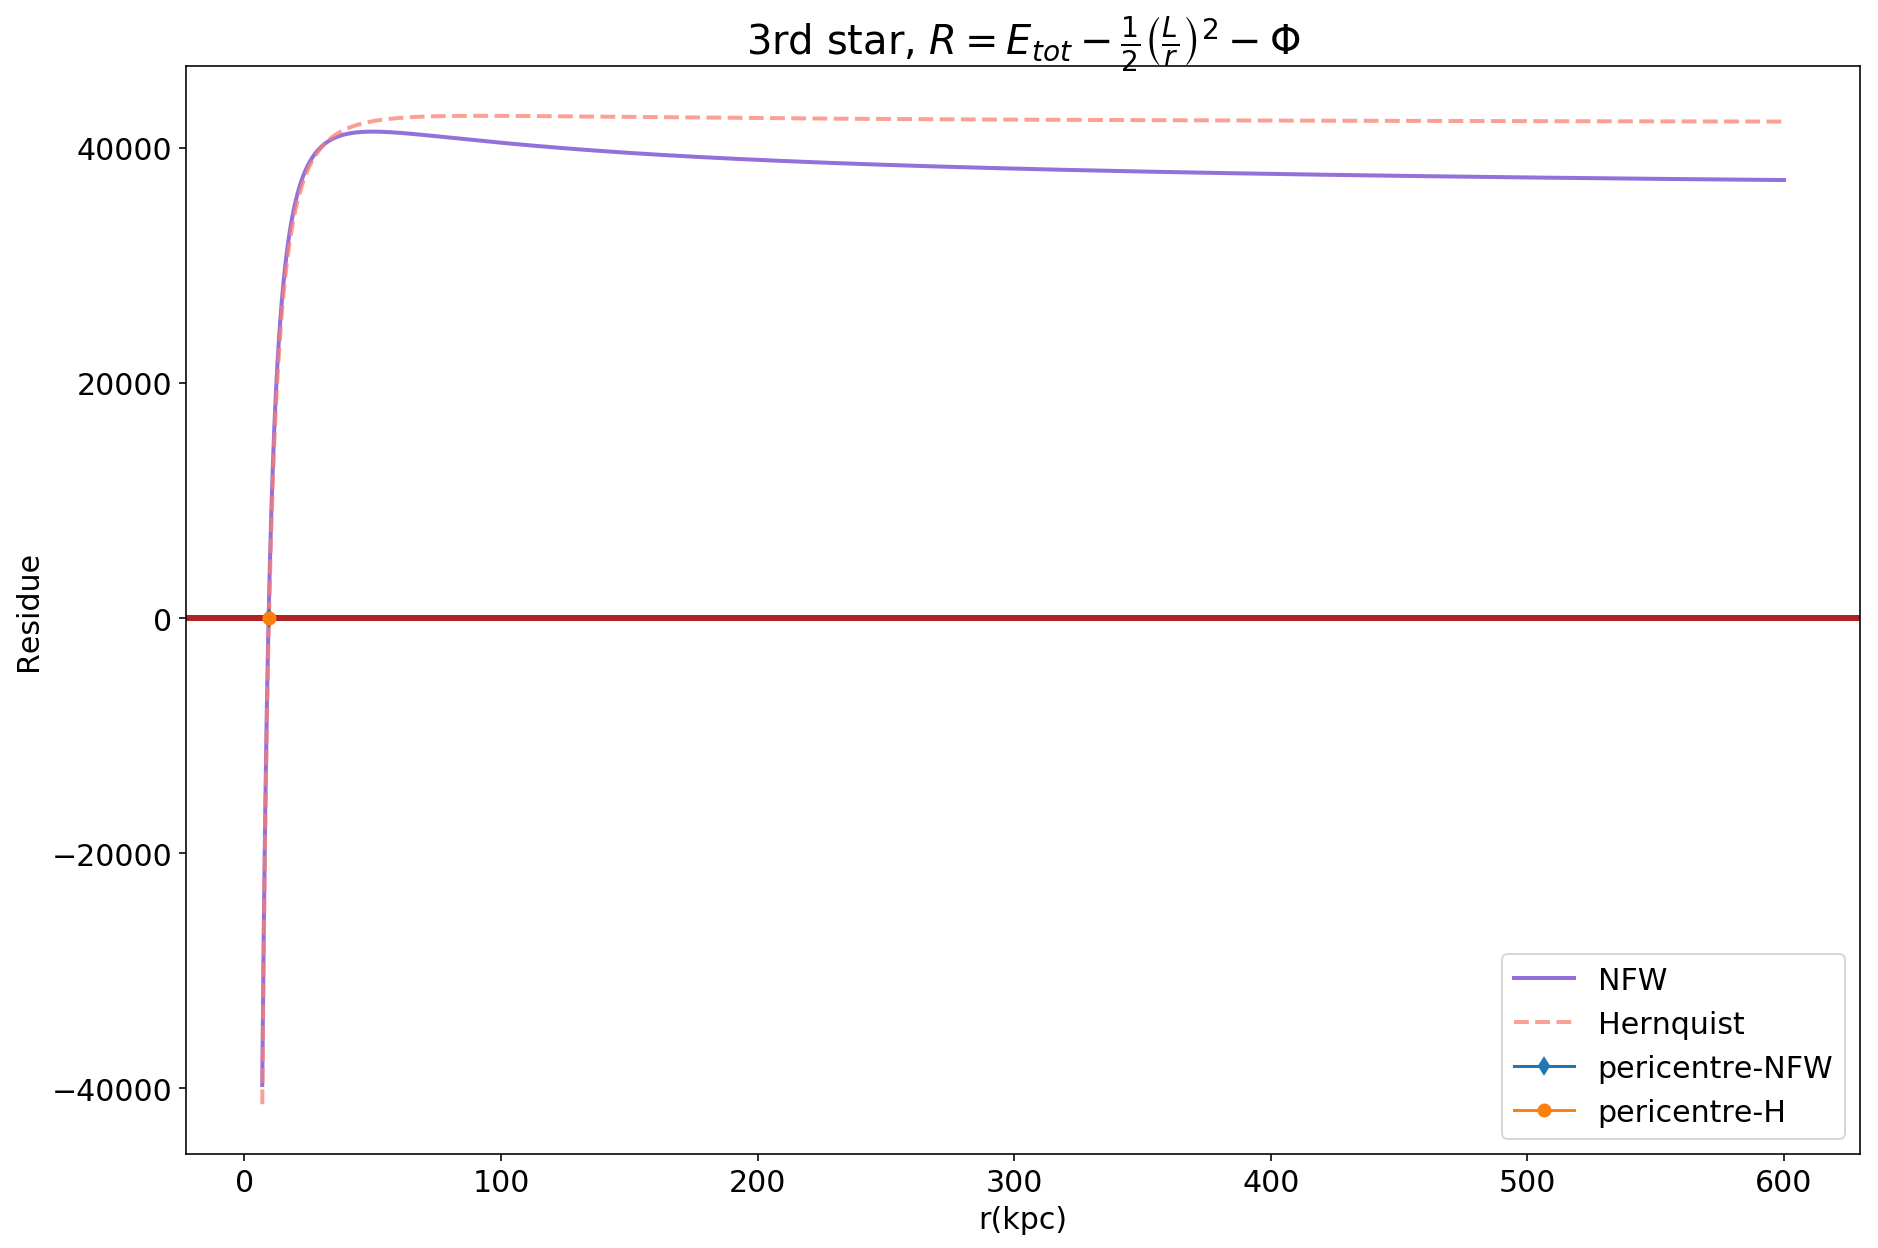

The radial action for NFW profile is: -5739.06584695 km/s kpc
The radial action for Hernquist profile is: 1670.56208801 km/s kpc


In [10]:
#3rd star
i = 2
R_nfw = Re(R3,Energy_nfw[i],Momentum[i],NFW(R3))
R_h = Re(R3,Energy_h[i],Momentum[i],H(R3))
plt.figure(figsize=(15,10))
plt.plot(R3,R_nfw,ls='-',label="NFW",color='#9370db',lw=2)
plt.plot(R3,R_h,ls='--',label="Hernquist",color='salmon',alpha=0.75,lw=2)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.axhline(y=0,color='#b22222',lw=3)
plt.title(r"3rd star, $R= E_{tot} - \frac{1}{2}\left(\frac{L}{r}\right)^2-\Phi$",fontsize=20)
plt.xlabel("r(kpc)",fontsize=15)
plt.ylabel("Residue",fontsize=15)
z1 = newton(R_NFW,10,args=(Energy_nfw[i],Momentum[i]),fprime=R_dNFW)
e1 = R_NFW(z1,Energy_nfw[i],Momentum[i])
print "The pericentre is found to be:",z1,"kpc","for the NFW profile"
plt.plot(z1,e1,marker='d',label='pericentre-NFW')
z2 = newton(R_H,10,args=(Energy_h[i],Momentum[i]),fprime=R_dH,fprime2=R_ddH)
e2 = R_H(z2,Energy_h[i],Momentum[i])
print "The pericentre is found to be:",z2,"kpc","for the Hernquist profile"
plt.plot(z2,e2,marker='o',label='pericentre-H')
plt.legend(fontsize=15)
plt.show()

J_NFW = quad(r_actionNFW,z1,np.inf,args=(Energy_nfw[i],Momentum[i]))
print "The radial action for NFW profile is:",J_NFW[0],"km/s kpc"
J_H = quad(r_actionH,z2,np.inf,args=(Energy_h[i],Momentum[i]))
print "The radial action for Hernquist profile is:",J_H[0],"km/s kpc"

The pericentre and apocentre are found to be: 64.9161691596 kpc and 697.429352749 kpc for the NFW profile
The pericentre is found to be: 67.7971003933 kpc for the Hernquist profile


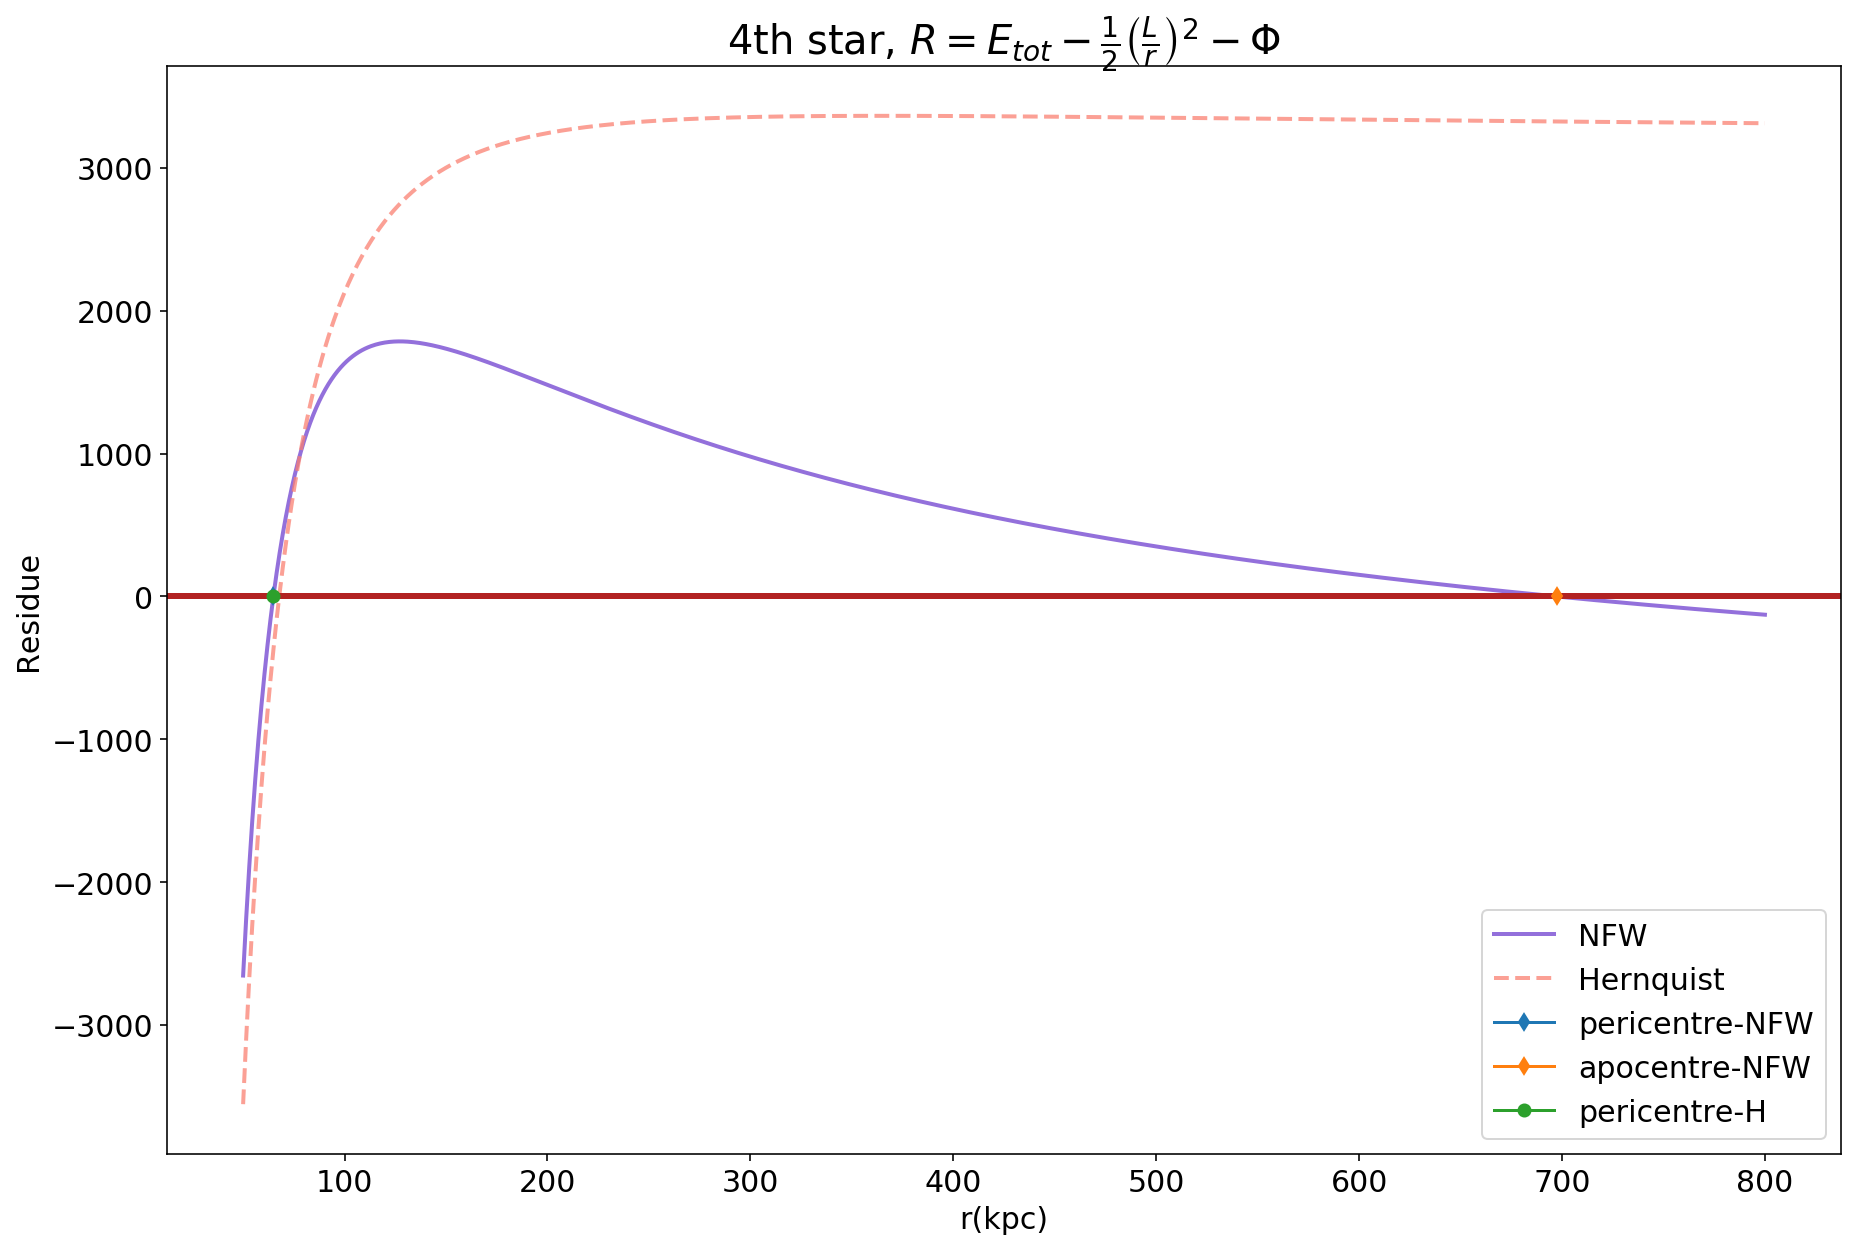

The radial action for NFW profile is: 7205.15921458 km/s kpc
The radial action for Hernquist profile is: 8535.27734375 km/s kpc


In [11]:
#4th star
i = 3
R_nfw = Re(R4,Energy_nfw[i],Momentum[i],NFW(R4))
R_h = Re(R4,Energy_h[i],Momentum[i],H(R4))
plt.figure(figsize=(15,10))
plt.plot(R4,R_nfw,ls='-',label="NFW",color='#9370db',lw=2)
plt.plot(R4,R_h,ls='--',label="Hernquist",color='salmon',alpha=0.75,lw=2)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.axhline(y=0,color='#b22222',lw=3)
plt.title(r"4th star, $R= E_{tot} - \frac{1}{2}\left(\frac{L}{r}\right)^2-\Phi$",fontsize=20)
plt.xlabel("r(kpc)",fontsize=15)
plt.ylabel("Residue",fontsize=15)
z1 = newton(R_NFW,10,args=(Energy_nfw[i],Momentum[i]),fprime=R_dNFW)
z2 = newton(R_NFW,400,args=(Energy_nfw[i],Momentum[i]),fprime=R_dNFW)
e1 = R_NFW(z1,Energy_nfw[i],Momentum[i])
e2 = R_NFW(z2,Energy_nfw[i],Momentum[i])
print "The pericentre and apocentre are found to be:",z1,"kpc","and",z2,"kpc","for the NFW profile"
plt.plot(z1,e1,marker='d',label='pericentre-NFW')
plt.plot(z2,e2,marker='d',label='apocentre-NFW')
z3 = newton(R_H,50,args=(Energy_h[i],Momentum[i]),fprime=R_dH,fprime2=R_ddH)
e3 = R_H(z3,Energy_h[i],Momentum[i])
print "The pericentre is found to be:",z3,"kpc","for the Hernquist profile"
plt.plot(z1,e1,marker='o',label='pericentre-H')
plt.legend(fontsize=15)
plt.show()

J_NFW = quad(r_actionNFW,z1,z2,args=(Energy_nfw[i],Momentum[i]))
print "The radial action for NFW profile is:",J_NFW[0],"km/s kpc"
J_H = quad(r_actionH,z3,np.inf,args=(Energy_h[i],Momentum[i]))
print "The radial action for Hernquist profile is:",J_H[0],"km/s kpc"

The pericentre is found to be: 52.2586723359 kpc for the NFW profile
The pericentre is found to be: 55.9497763757 kpc for the Hernquist profile


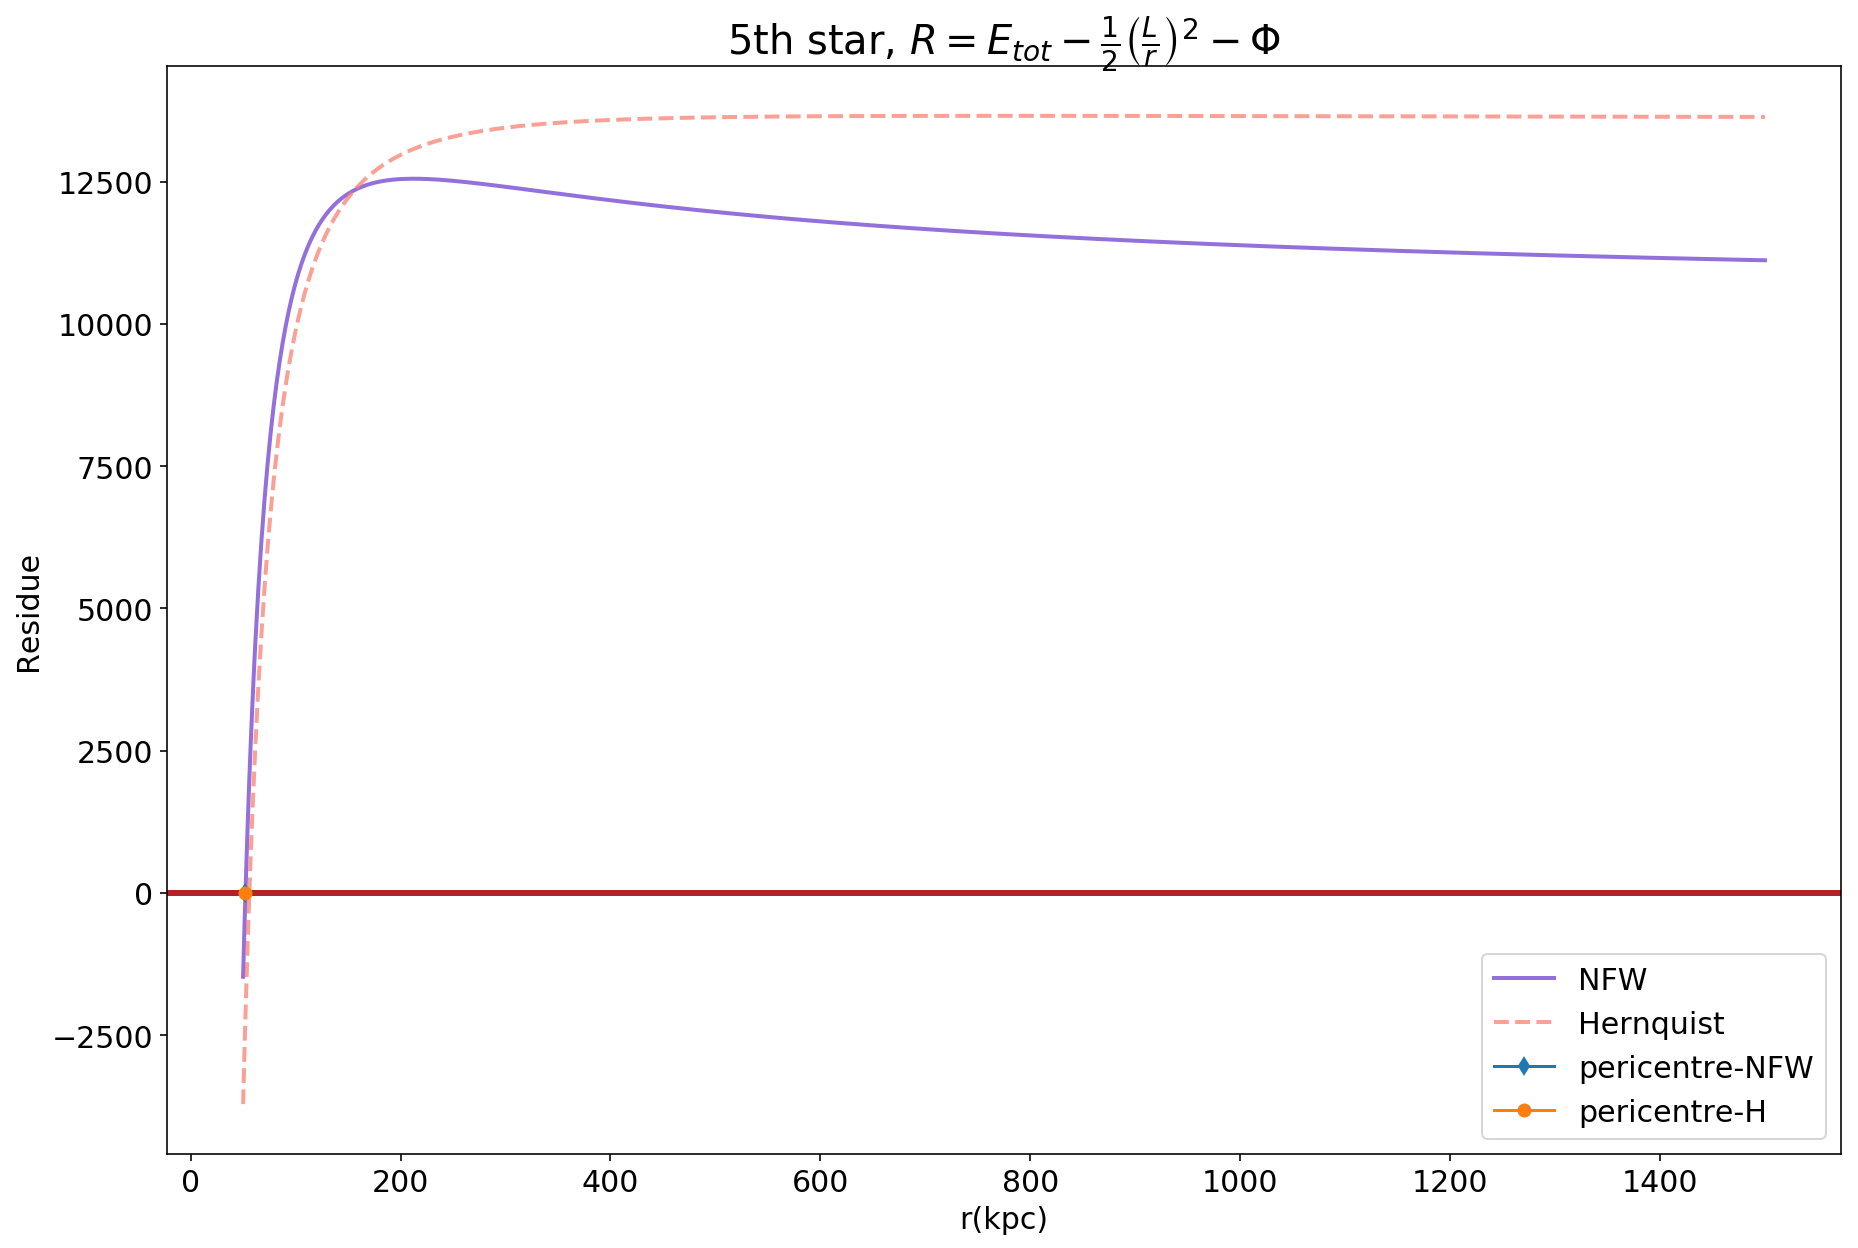

The radial action for NFW profile is: -17481.7093242 km/s kpc
The radial action for Hernquist profile is: 1741.24693298 km/s kpc


In [12]:
#5th star
i = 4
R_nfw = Re(R5,Energy_nfw[i],Momentum[i],NFW(R5))
R_h = Re(R5,Energy_h[i],Momentum[i],H(R5))
plt.figure(figsize=(15,10))
plt.plot(R5,R_nfw,ls='-',label="NFW",color='#9370db',lw=2)
plt.plot(R5,R_h,ls='--',label="Hernquist",color='salmon',alpha=0.75,lw=2)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.axhline(y=0,color='#b22222',lw=3)
plt.title(r"5th star, $R= E_{tot} - \frac{1}{2}\left(\frac{L}{r}\right)^2-\Phi$",fontsize=20)
plt.xlabel("r(kpc)",fontsize=15)
plt.ylabel("Residue",fontsize=15)
z1 = newton(R_NFW,10,args=(Energy_nfw[i],Momentum[i]),fprime=R_dNFW)
e1 = R_NFW(z1,Energy_nfw[i],Momentum[i])
print "The pericentre is found to be:",z1,"kpc","for the NFW profile"
plt.plot(z1,e1,marker='d',label='pericentre-NFW')
z2 = newton(R_H,50,args=(Energy_h[i],Momentum[i]),fprime=R_dH,fprime2=R_ddH)
e2 = R_H(z2,Energy_h[i],Momentum[i])
print "The pericentre is found to be:",z2,"kpc","for the Hernquist profile"
plt.plot(z1,e1,marker='o',label='pericentre-H')
plt.legend(fontsize=15)
plt.show()

J_NFW = quad(r_actionNFW,z1,np.inf,args=(Energy_nfw[i],Momentum[i]))
print "The radial action for NFW profile is:",J_NFW[0],"km/s kpc"
J_H = quad(r_actionH,z2,np.inf,args=(Energy_h[i],Momentum[i]))
print "The radial action for Hernquist profile is:",J_H[0],"km/s kpc"

The table below lists all the parameters of the five stars.

<img src="Desktop/table.png">

## Problem 3 -- System of equations

$$f(x,y) = x^2+y^2-50=0$$
$$g(x,y) = x \times y -25 = 0$$

### (a) Analytical solution

First $f(x,y)-2g(x,y)$,we find:
\begin{align*}
x^2+y^2-2xy &=0\\
(x-y)^2 &= 0\\
x&=y
\end{align*}
Then $f(x,y)+2g(x,y)$,we find:
\begin{align*}
x^2+y^2+2xy &=100\\
(x+y)^2 &= 100\\
x,y = 5,5 \ &or -5,-5
\end{align*}

### (b) Newton's method

Newton-Raphson method can also be applied to solve multivariate systems. The algorithm is simply as follows:
* Suppose we have an N-D multivariate system of the form:
\begin{cases}
f_1(x_1,...,x_N)=f_1(\mathbf{x})=0\\
f_2(x_1,...,x_N)=f_2(\mathbf{x})=0\\
...... \\
f_N(x_1,...,x_N)=f_N(\mathbf{x})=0\\
\end{cases}
where we have defined 
$$\mathbf{x}=[x_1,...,x_N]^T$$
Define a vector function
$$\mathbf{f}(\mathbf{x})=[f_1(\mathbf{x}),...,f_N(\mathbf{x})]^T$$
So that the equation system above can be written as
$$\mathbf{f}(\mathbf{x})=\mathbf{0}$$
* $\mathbf{J}_{\mathbf{f}}(\mathbf{x})$ is the $\textit{Jacobian matrix}$ over the function vector $\mathbf{f}(\mathbf{x})$ 
$$\mathbf{J}_{\mathbf{f}}(\mathbf{x})=\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_N} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_N}{\partial x_1} & \dots & \frac{\partial f_N}{\partial x_N}
\end{bmatrix}$$
* If all equations are linear we have
$$\mathbf{f}(\mathbf{x}+\delta \mathbf{x})=\mathbf{f}(\mathbf{x})+\mathbf{J}(\mathbf{x})\delta\mathbf{x}$$
* by assuming $\mathbf{f}(\mathbf{x}+\delta \mathbf{x})=0$, we can find the roots as $\mathbf{x}+\delta \mathbf{x}$, where
$$\delta \mathbf{x} = -\mathbf{J}(\mathbf{x})^{-1}\mathbf{f}(\mathbf{x})$$
* The approximation can be improved iteratively
$$\mathbf{x}_{n+1} = \mathbf{x}_n +\delta \mathbf{x}_n = \mathbf{x}_n-\mathbf{J}(\mathbf{x}_n)^{-1}\mathbf{f}(\mathbf{x}_n)$$

In [72]:
from scipy.optimize import fsolve
import numpy as np

f1 = lambda x: [x[0]**2+x[1]**2-50,x[0]*x[1]-25]
#the Jacobian needed to implement Newton's method
fd = lambda x: np.array([[2*x[0],2*x[1]],[x[1],x[0]]]).reshape(2,2)
#define the domain where we want to find the solution (x,y)
a = np.linspace(-10,10,100)
b = a
#for every point (a,b), pass on to fsolve and append the result 
#then round the result and see how many pairs of solutions there are
i = 0
result = np.array([[5,5]])
#print result
for a,b in zip(a,b):
    x = fsolve(f1,[a,b],fprime=fd)
    x = np.round(x)
    result = np.append(result,[x],axis=0)

print "The sets of solutions are found to be:",np.unique(result,axis=0)


The sets of solutions are found to be: [[-5. -5.]
 [ 5.  5.]]


From above we learn that the solutions are indeed left with $(x,y) = (5,5)$ or $(x,y) = (-5,-5)$ 

### (c) Convergence

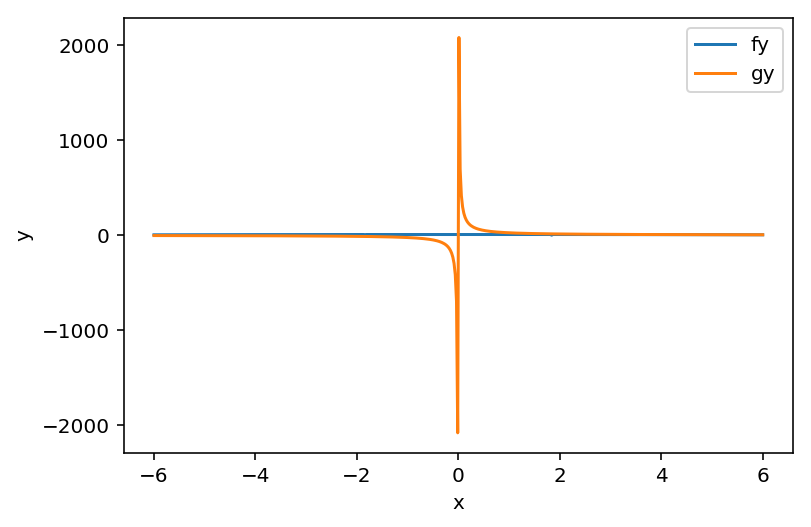

In [33]:
%config InlineBackend.figure_format = 'retina' 
import numpy as np
from scipy.optimize import fsolve

import matplotlib.pyplot as plt

def f(x, y):
    return x**2+y**2-50;

def g(x, y):
    return x*y-25

x = np.linspace(-6, 6, 500)

@np.vectorize
def fy(x):
    x0 = 0.0
    def tmp(y):
        return f(x, y)
    y1, = fsolve(tmp, x0)
    return y1

@np.vectorize
def gy(x):
    x0 = 0.0
    def tmp(y):
        return g(x, y)
    y1, = fsolve(tmp, x0)
    return y1


plt.plot(x, fy(x), x, gy(x))
plt.xlabel('x')
plt.ylabel('y')
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
plt.legend(['fy', 'gy'])
plt.show()
#print fy(x)

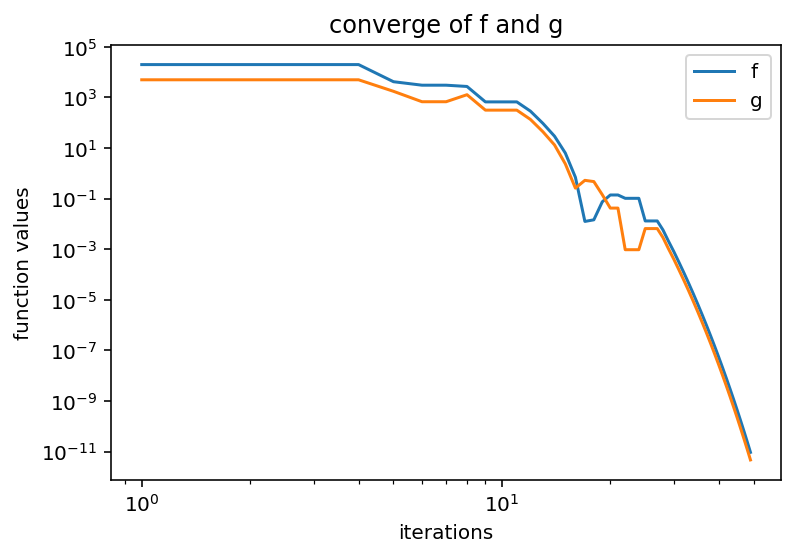

In [58]:
i =1
I = np.array([])
F = np.array([])
G = np.array([])
X_std = np.array([])
Y_std = np.array([])
while i<50:
    x_result = fsolve(f1,[-100,-100],maxfev=i)
    f_result = f(x_result[0],x_result[1])
    g_result = g(x_result[0],x_result[1])
    x1_std = abs(x_result[0]+5.0)
    x2_std = abs(x_result[1]+5.0)
    F = np.append(F,f_result)
    G = np.append(G,g_result)
    I = np.append(I,i)
    X_std = np.append(X_std,x1_std)
    Y_std = np.append(Y_std,x2_std)
    i+=1
xtol = 1.49012e-08
plt.loglog(I,np.abs(F),I,np.abs(G))
plt.title("converge of f and g")
plt.xlabel("iterations")
plt.ylabel("function values")
plt.legend(['f','g'])
plt.show()

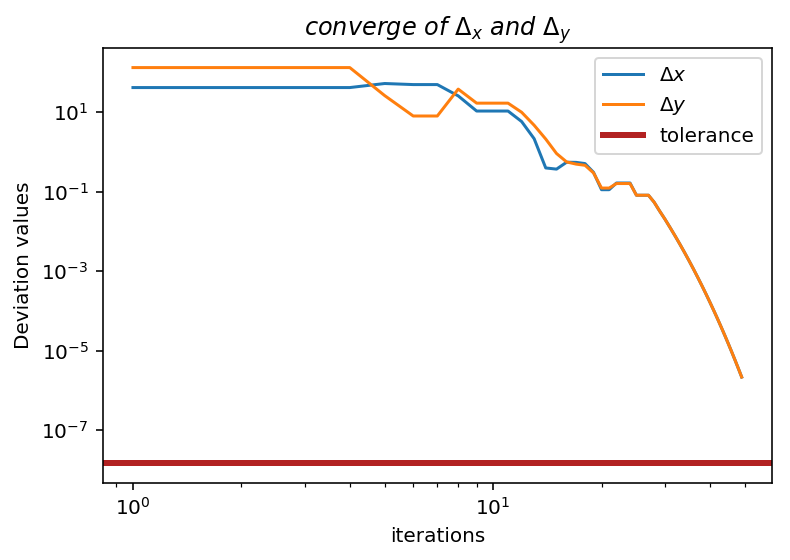

In [61]:
plt.loglog(I,X_std,I,Y_std)
plt.axhline(y=xtol,color='#b22222',lw=3)
plt.title(r"$converge \ of \ \Delta_x \ and \ \Delta_y$")
plt.xlabel("iterations")
plt.ylabel("Deviation values")
plt.legend([r'$\Delta x$',r'$\Delta y$','tolerance'])
plt.show()

### (d) Maximum iterations

Now also apply the Jacobian. The jacobian of the system of equation is simply as follows
$$\mathbf{J} = \begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{bmatrix}$$

$$=\begin{bmatrix}
2x & 2y \\
y  &  x
\end{bmatrix}$$

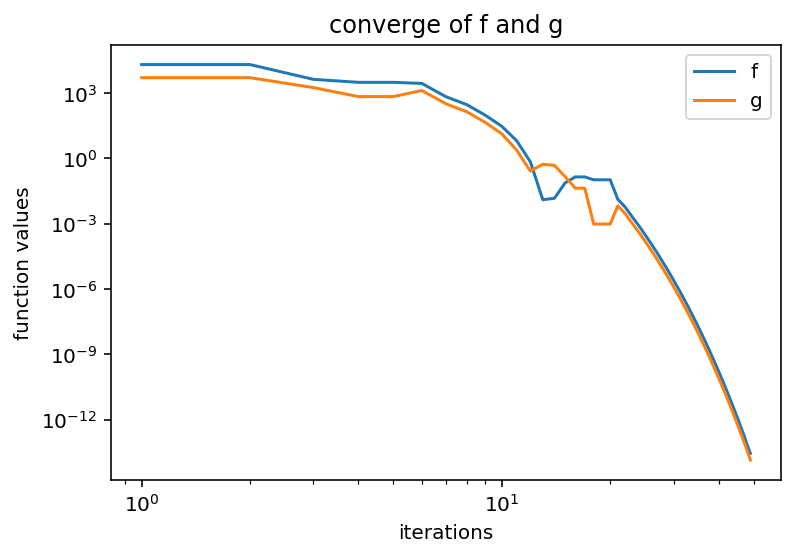

In [70]:
fd = lambda x: np.array([[2*x[0],2*x[1]],[x[1],x[0]]]).reshape(2,2)


i =1
I = np.array([])
F = np.array([])
G = np.array([])
X_std = np.array([])
Y_std = np.array([])
while i<50:
    x_result = fsolve(f1,[-100,-100],fprime=fd,maxfev=i)
    f_result = f(x_result[0],x_result[1])
    g_result = g(x_result[0],x_result[1])
    x1_std = abs(x_result[0]+5.0)
    x2_std = abs(x_result[1]+5.0)
    F = np.append(F,f_result)
    G = np.append(G,g_result)
    I = np.append(I,i)
    X_std = np.append(X_std,x1_std)
    Y_std = np.append(Y_std,x2_std)
    i+=1
xtol = 1.49012e-08
plt.loglog(I,np.abs(F),I,np.abs(G))
plt.title("converge of f and g")
plt.xlabel("iterations")
plt.ylabel("function values")
plt.legend(['f','g'])
plt.show()

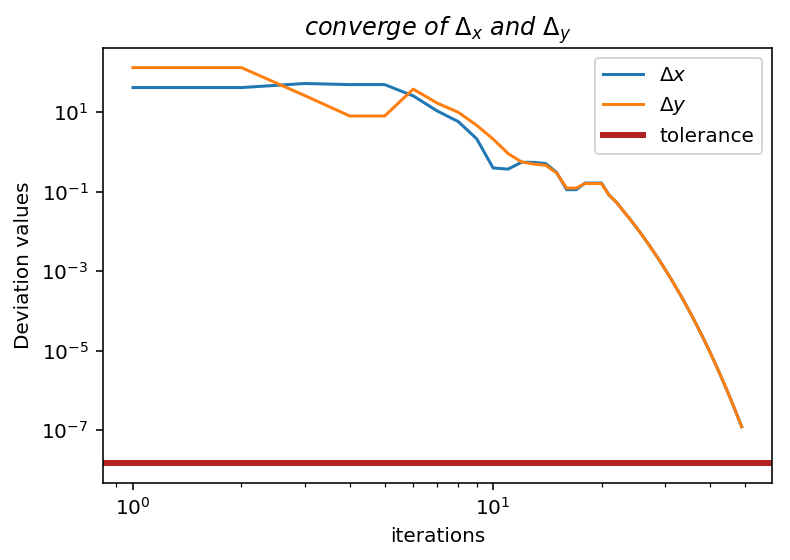

In [71]:
plt.loglog(I,X_std,I,Y_std)
plt.axhline(y=xtol,color='#b22222',lw=3)
plt.title(r"$converge \ of \ \Delta_x \ and \ \Delta_y$")
plt.xlabel("iterations")
plt.ylabel("Deviation values")
plt.legend([r'$\Delta x$',r'$\Delta y$','tolerance'])
plt.show()

Now that we have applied the Jacobian and it can be seen directly from the two plots above that they both drop more quickly to zero, and f and g (also $\Delta x$ and $\Delta y$) started to converge more quickly in the case when the Jacobian is applied, and is approaching the tolerance much faster ($\Delta x$ and $\Delta y$). This happens because when the comupter is trying to build up the Jacobian, it needs multiple sets of solutions to estimate the partial derivatives, and the derivatives are all just calculated from $\frac{f(x+\Delta x)}{\Delta x}$ and its accuracy will only increase with the cumulation of sets of solutions. But in the case of the Jacobian is applied, the function for the first derivative is then already known, so even if we start very far off we can still have an exponential increase in accuracy (the increase in accuracy in the case without Jacobian is also exponential but much slower, approximately 10 times slower).